# Description

It generates different general plots to compare coefficient values from Pearson, Spearman, Clustermatch and Maximal Information Coefficient (MIC), such as their distribution. This notebook focuses on MIC.

In `Settings` below, the data set and other options (such as tissue for GTEx) are specified.

# Modules

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

from clustermatch.plots import plot_histogram, plot_cumulative_histogram, jointplot
from clustermatch import conf

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX
GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

In [3]:
# this is used for the cumulative histogram
GENE_PAIRS_PERCENT = 0.70

# Paths

In [4]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [5]:
OUTPUT_FIGURE_DIR = (
    conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / f"gtex_{GTEX_TISSUE}" / "mic"
)
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/mic')

In [6]:
COMPARISONS_DIR = DATASET_CONFIG["RESULTS_DIR"] / "comparison_others"
display(COMPARISONS_DIR)

PosixPath('/opt/data/results/gtex_v8/comparison_others')

In [7]:
INPUT_FILE = COMPARISONS_DIR / f"gtex_v8_data_{GTEX_TISSUE}-{GENE_SEL_STRATEGY}-all.pkl"
display(INPUT_FILE)

assert INPUT_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/comparison_others/gtex_v8_data_whole_blood-var_pc_log2-all.pkl')

# Data

In [8]:
corrs_df = pd.read_pickle(INPUT_FILE)

In [9]:
corrs_df.shape

(100000, 5)

In [10]:
corrs_df.head()

clustermatch   pearson  spearman  \
ENSG00000000419.12 ENSG00000103335.21      0.026871  0.019368  0.001063   
                   ENSG00000118515.11      0.044350  0.159679  0.298670   
                   ENSG00000119013.8       0.411877  0.731489  0.800159   
                   ENSG00000126262.4       0.253667  0.525495  0.649911   
                   ENSG00000134686.18      0.184217  0.467763  0.548222   

                                            mic mic_subset  
ENSG00000000419.12 ENSG00000103335.21  0.190166        all  
                   ENSG00000118515.11  0.202427        all  
                   ENSG00000119013.8   0.569112        all  
                   ENSG00000126262.4   0.391753        all  
                   ENSG00000134686.18  0.319649        all

## Data stats

In [11]:
corrs_df.describe().applymap(str)

,clustermatch,pearson,spearman,mic
count,100000.0,100000.0,100000.0,100000.0
mean,0.1407573472700409,0.3054003338769138,0.39461127472960383,0.3002206242462508
std,0.1445228187514837,0.24286207737020646,0.2591538271543309,0.14840760816593887
min,0.0,2.5438786227516275e-06,2.6762936711222096e-07,0.11223625535959839
25%,0.028484755003948113,0.09499704677583418,0.16381764549263292,0.18518310095624893
50%,0.08139034659660288,0.23843562607277313,0.36676860664661387,0.24605328088573442
75%,0.21756498428043292,0.49421120022916165,0.6151301369201667,0.38138246339648574
max,0.7801812505004676,0.9796111936678367,0.970189167999527,0.9111602214105493


In [12]:
# skewness
corrs_df.drop(columns=["mic_subset"]).apply(lambda x: stats.skew(x))

clustermatch    1.280476
pearson         0.622770
spearman        0.243201
mic             1.163338
dtype: float64

# MIC subset: all gene pairs

In [13]:
# this is supposed to be one of the values of column "mic_subset"
mic_subset = "all"

## Select MIC subset

In [14]:
df = corrs_df[corrs_df["mic_subset"].isin((mic_subset,))].drop(columns=["mic_subset"])

In [15]:
df.shape

(100000, 4)

In [16]:
df.head()

clustermatch   pearson  spearman  \
ENSG00000000419.12 ENSG00000103335.21      0.026871  0.019368  0.001063   
                   ENSG00000118515.11      0.044350  0.159679  0.298670   
                   ENSG00000119013.8       0.411877  0.731489  0.800159   
                   ENSG00000126262.4       0.253667  0.525495  0.649911   
                   ENSG00000134686.18      0.184217  0.467763  0.548222   

                                            mic  
ENSG00000000419.12 ENSG00000103335.21  0.190166  
                   ENSG00000118515.11  0.202427  
                   ENSG00000119013.8   0.569112  
                   ENSG00000126262.4   0.391753  
                   ENSG00000134686.18  0.319649

## Histogram plot

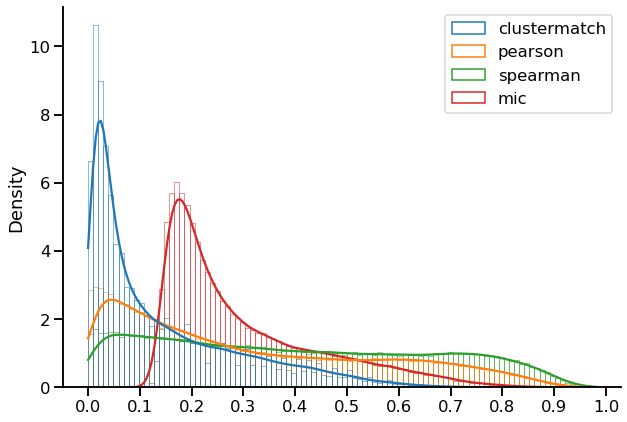

In [17]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_histogram(df, output_dir=OUTPUT_FIGURE_DIR, fill=False)

**UPDATE**

Coefficients' values distribute very differently. Clustermatch is skewed to the left, whereas Pearson and specially Spearman seem more uniform.

## Cumulative histogram plot

I include also a cumulative histogram without specifying `bins`.

clustermatch    0.181713
mic             0.344996
pearson         0.433716
spearman        0.563060
Name: 0.7, dtype: float64

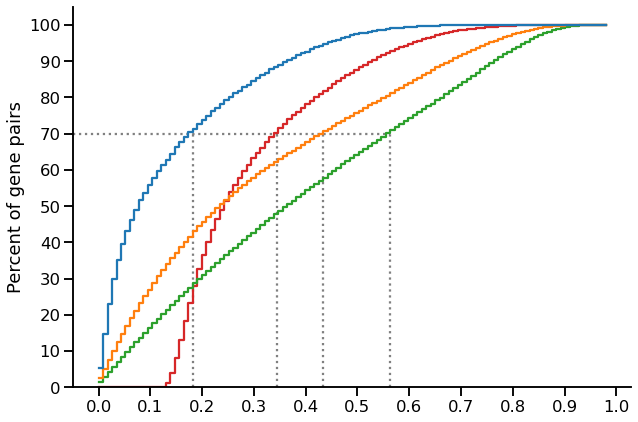

In [18]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_cumulative_histogram(df, GENE_PAIRS_PERCENT, output_dir=OUTPUT_FIGURE_DIR)

## Joint plots comparing each coefficient

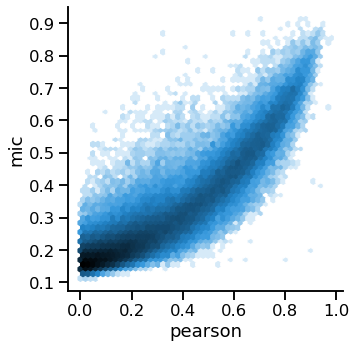

In [19]:
with sns.plotting_context("talk", font_scale=1.0):
    jointplot(
        data=df,
        x="pearson",
        y="mic",
        add_corr_coefs=False,
        output_dir=OUTPUT_FIGURE_DIR,
    )

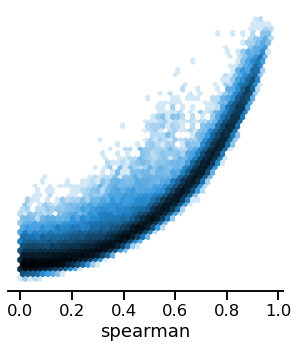

In [20]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = "spearman", "mic"

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    g.savefig(
        OUTPUT_FIGURE_DIR / f"dist-{x}_vs_{y}.svg",
        bbox_inches="tight",
        dpi=300,
        facecolor="white",
    )

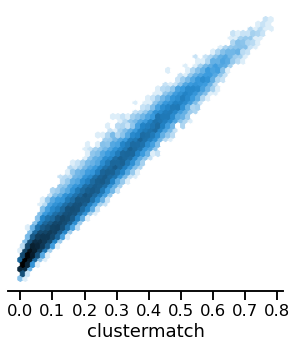

In [21]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = "clustermatch", "mic"

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    g.savefig(
        OUTPUT_FIGURE_DIR / f"dist-{x}_vs_{y}.svg",
        bbox_inches="tight",
        dpi=300,
        facecolor="white",
    )

## Compute correlations

These are the correlation between the correlation values (!). The idea is to see how coefficient match.

In [22]:
df.corr()

,clustermatch,pearson,spearman,mic
clustermatch,1.000000,0.879654,0.904655,0.987270
pearson,0.879654,1.000000,0.932339,0.903975
spearman,0.904655,0.932339,1.000000,0.915571
mic,0.987270,0.903975,0.915571,1.000000


In [23]:
df.corr("spearman")

,clustermatch,pearson,spearman,mic
clustermatch,1.000000,0.868458,0.943065,0.978154
pearson,0.868458,1.000000,0.917422,0.877446
spearman,0.943065,0.917422,1.000000,0.928203
mic,0.978154,0.877446,0.928203,1.000000
